In [73]:
import os
import s3fs
import pandas as pd

# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})
BUCKET = "atoubert-ensae"
FILE_KEY_S3 = "X_train_Hi5.csv"
FILE_PATH_S3 = BUCKET + "/Hackathon Hiparis/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    x_train = pd.read_csv(file_in, sep=",")

/tmp/ipykernel_2480/3036990934.py:13: DtypeWarning: Columns (108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  x_train = pd.read_csv(file_in, sep=",")


In [74]:
import copy as cp
df=x_train
for proportion_nan_prct in [19]:
    new_df = cp.deepcopy(df)
    for col in new_df.columns:
        if new_df[col].isnull().sum() * 100 / len(df) > proportion_nan_prct:
            new_df.drop(col, axis=1, inplace=True)

new_df.head()

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,hydro_latitude,hydro_hydro_quantity_elab,distance_piezo_hydro,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,0,01,Sun Jul 14 13:00:02 CEST 2024,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,...,45.874843,QmJ,7.093852,1.793055e+09,11.8,992.0,25250,2.9,16.2,High
1,1,01,Sun Jul 14 13:00:02 CEST 2024,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,...,46.047082,QmM,2.624373,1.085125e+09,0.6,1786.0,24660,44.5,11,Very High
2,2,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,...,45.906423,QmJ,1.542071,3.810492e+08,0,8085.0,24890,8.4,7.8,High
3,3,01,Sun Jul 14 13:00:02 CEST 2024,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,...,46.137641,QmM,7.163470,3.800911e+08,1.5,2838.0,39700,2.4,5.2,Very High
4,4,01,Sun Jul 14 13:00:02 CEST 2024,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,...,46.143007,QmJ,1.528669,1.966631e+07,0.2,1352.0,26180,21.5,9.8,Very Low


In [75]:
df=new_df

In [76]:
df.head()

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,hydro_latitude,hydro_hydro_quantity_elab,distance_piezo_hydro,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,0,01,Sun Jul 14 13:00:02 CEST 2024,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,...,45.874843,QmJ,7.093852,1.793055e+09,11.8,992.0,25250,2.9,16.2,High
1,1,01,Sun Jul 14 13:00:02 CEST 2024,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,...,46.047082,QmM,2.624373,1.085125e+09,0.6,1786.0,24660,44.5,11,Very High
2,2,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,...,45.906423,QmJ,1.542071,3.810492e+08,0,8085.0,24890,8.4,7.8,High
3,3,01,Sun Jul 14 13:00:02 CEST 2024,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,...,46.137641,QmM,7.163470,3.800911e+08,1.5,2838.0,39700,2.4,5.2,Very High
4,4,01,Sun Jul 14 13:00:02 CEST 2024,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,...,46.143007,QmJ,1.528669,1.966631e+07,0.2,1352.0,26180,21.5,9.8,Very Low


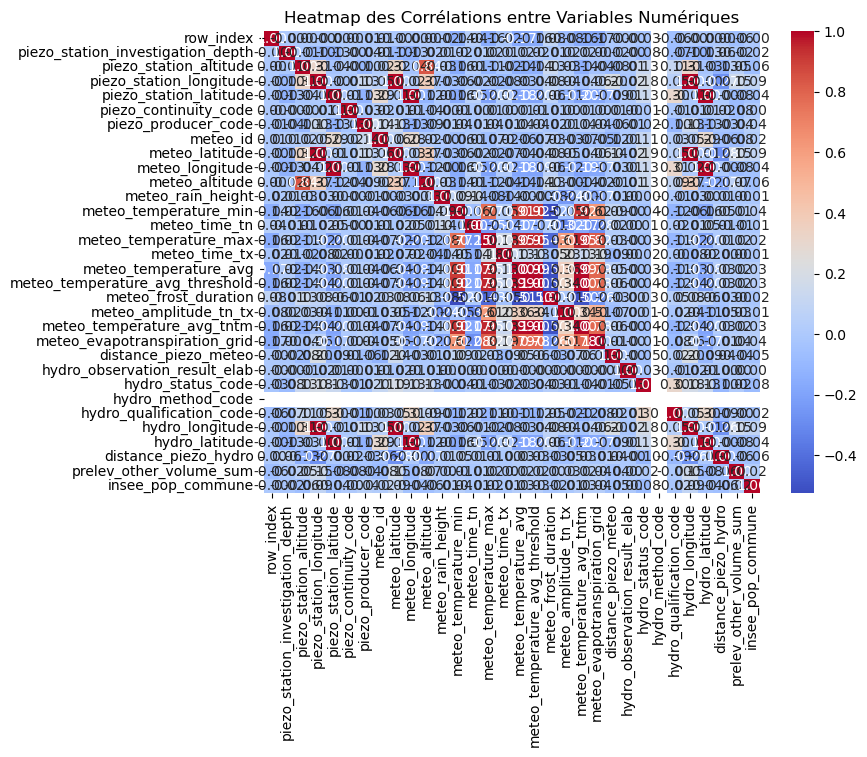

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Sélection des colonnes numériques
numeric_df = df.select_dtypes(include='number')

# Calcul de la matrice des corrélations
correlation_matrix = numeric_df.corr()

# Création d'un heatmap pour visualiser les corrélations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap des Corrélations entre Variables Numériques")
plt.show()

In [78]:
numeric_df = df.select_dtypes(include='number')

# Calcul de la matrice de corrélation
corr_matrix = numeric_df.corr()

# Définir un seuil de corrélation
threshold = 0.7

# Identifier les colonnes numériques à supprimer
columns_to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:  # Corrélation trop élevée
            colname = corr_matrix.columns[j]  # Conserver une seule colonne par paire
            columns_to_drop.add(colname)

# Supprimer uniquement les colonnes numériques trop corrélées
df = df.drop(columns=columns_to_drop)

In [45]:
df.head()

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,hydro_qualification_label,hydro_hydro_quantity_elab,distance_piezo_hydro,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,0,01,Sun Jul 14 13:00:02 CEST 2024,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,...,Bonne,QmJ,7.093852,1.793055e+09,11.8,992.0,25250,2.9,16.2,High
1,1,01,Sun Jul 14 13:00:02 CEST 2024,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,...,Bonne,QmM,2.624373,1.085125e+09,0.6,1786.0,24660,44.5,11,Very High
2,2,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,...,Bonne,QmJ,1.542071,3.810492e+08,0,8085.0,24890,8.4,7.8,High
3,3,01,Sun Jul 14 13:00:02 CEST 2024,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,...,Douteuse,QmM,7.163470,3.800911e+08,1.5,2838.0,39700,2.4,5.2,Very High
4,4,01,Sun Jul 14 13:00:02 CEST 2024,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,...,Bonne,QmJ,1.528669,1.966631e+07,0.2,1352.0,26180,21.5,9.8,Very Low


In [79]:


# Identifier les colonnes catégorielles
categorical_columns = df.select_dtypes(include='object').columns



In [80]:
categorical_columns.tolist

<bound method IndexOpsMixin.tolist of Index(['piezo_station_department_code', 'piezo_station_update_date',
       'piezo_station_department_name', 'piezo_station_commune_code_insee',
       'piezo_station_pe_label', 'piezo_station_bdlisa_codes',
       'piezo_station_bss_code', 'piezo_station_commune_name',
       'piezo_station_bss_id', 'piezo_bss_code', 'piezo_measurement_date',
       'piezo_obtention_mode', 'piezo_status', 'piezo_qualification',
       'piezo_continuity_name', 'piezo_producer_name',
       'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name',
       'meteo_date', 'hydro_station_code', 'hydro_observation_date_elab',
       'hydro_status_label', 'hydro_method_label', 'hydro_qualification_label',
       'hydro_hydro_quantity_elab', 'insee_%_agri', 'insee_med_living_level',
       'insee_%_ind', 'insee_%_const', 'piezo_groundwater_level_category'],
      dtype='object')>

In [81]:
categorical_columns

Index(['piezo_station_department_code', 'piezo_station_update_date',
       'piezo_station_department_name', 'piezo_station_commune_code_insee',
       'piezo_station_pe_label', 'piezo_station_bdlisa_codes',
       'piezo_station_bss_code', 'piezo_station_commune_name',
       'piezo_station_bss_id', 'piezo_bss_code', 'piezo_measurement_date',
       'piezo_obtention_mode', 'piezo_status', 'piezo_qualification',
       'piezo_continuity_name', 'piezo_producer_name',
       'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name',
       'meteo_date', 'hydro_station_code', 'hydro_observation_date_elab',
       'hydro_status_label', 'hydro_method_label', 'hydro_qualification_label',
       'hydro_hydro_quantity_elab', 'insee_%_agri', 'insee_med_living_level',
       'insee_%_ind', 'insee_%_const', 'piezo_groundwater_level_category'],
      dtype='object')

In [82]:
# Trouver les colonnes avec des valeurs identiques
identical_columns = df.columns[df.nunique() == 1]

print(identical_columns)

Index(['hydro_method_code', 'hydro_method_label'], dtype='object')


In [83]:
df=df.drop(columns="hydro_method_code")

In [84]:
df=df.drop(columns="piezo_station_update_date")

In [85]:
# Conversion de la colonne en format datetime
df['piezo_measurement_date'] = pd.to_datetime(df['piezo_measurement_date'])

# Création des colonnes 'mois' et 'année'
df['mois'] = df['piezo_measurement_date'].dt.month
df['année'] = df['piezo_measurement_date'].dt.year



0          16
1          16
2          16
3          16
4          12
           ..
2830311    12
2830312    16
2830313    16
2830314    16
2830315    16
Name: hydro_status_code, Length: 2830316, dtype: int64

In [86]:
df.head()

,row_index,piezo_station_department_code,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_commune_name,...,distance_piezo_hydro,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category,mois,année
0,0,01,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,Ceyzérieu,...,7.093852,1.793055e+09,11.8,992.0,25250,2.9,16.2,High,1,2020
1,1,01,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,Saint-Jean-le-Vieux,...,2.624373,1.085125e+09,0.6,1786.0,24660,44.5,11,Very High,1,2020
2,2,01,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,Meximieux,...,1.542071,3.810492e+08,0,8085.0,24890,8.4,7.8,High,1,2020
3,3,01,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,Péron,...,7.163470,3.800911e+08,1.5,2838.0,39700,2.4,5.2,Very High,1,2020
4,4,01,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,Tossiat,...,1.528669,1.966631e+07,0.2,1352.0,26180,21.5,9.8,Very Low,1,2020


In [87]:
df=df.drop(columns=["piezo_measurement_date"])

In [88]:
df.drop(columns="piezo_station_update_date")

KeyError: "['piezo_station_update_date'] not found in axis"

In [25]:
df.head()

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,distance_piezo_hydro,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category,mois,année
0,0,01,Sun Jul 14 13:00:02 CEST 2024,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,...,7.093852,1.793055e+09,11.8,992.0,25250,2.9,16.2,High,1,2020
1,1,01,Sun Jul 14 13:00:02 CEST 2024,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,...,2.624373,1.085125e+09,0.6,1786.0,24660,44.5,11,Very High,1,2020
2,2,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,...,1.542071,3.810492e+08,0,8085.0,24890,8.4,7.8,High,1,2020
3,3,01,Sun Jul 14 13:00:02 CEST 2024,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,...,7.163470,3.800911e+08,1.5,2838.0,39700,2.4,5.2,Very High,1,2020
4,4,01,Sun Jul 14 13:00:02 CEST 2024,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,...,1.528669,1.966631e+07,0.2,1352.0,26180,21.5,9.8,Very Low,1,2020


In [67]:
categorical_columns = df.select_dtypes(include='object').columns
print(categorical_columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['piezo_station_department_code', 'piezo_station_department_name',
       'piezo_station_commune_code_insee', 'piezo_station_pe_label',
       'piezo_station_bdlisa_codes', 'piezo_station_bss_code',
       'piezo_station_commune_name', 'piezo_station_bss_id', 'piezo_bss_code',
       'piezo_obtention_mode', 'piezo_status', 'piezo_qualification',
       'piezo_continuity_name', 'piezo_producer_name',
       'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name',
       'meteo_date', 'hydro_station_code', 'hydro_observation_date_elab',
       'hydro_status_label', 'hydro_method_label', 'hydro_qualification_label',
       'hydro_hydro_quantity_elab', 'insee_%_agri', 'insee_med_living_level',
       'insee_%_ind', 'insee_%_const', 'piezo_groundwater_level_category'],
      dtype='object')>


In [68]:
numerical_columns = df.select_dtypes(include='number').columns
print(numerical_columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['row_index', 'piezo_station_investigation_depth',
       'piezo_station_altitude', 'piezo_station_longitude',
       'piezo_station_latitude', 'piezo_continuity_code',
       'piezo_producer_code', 'meteo_id', 'meteo_rain_height',
       'meteo_temperature_min', 'meteo_time_tn', 'meteo_time_tx',
       'meteo_frost_duration', 'meteo_amplitude_tn_tx', 'distance_piezo_meteo',
       'hydro_observation_result_elab', 'hydro_status_code',
       'hydro_qualification_code', 'distance_piezo_hydro',
       'prelev_other_volume_sum', 'insee_pop_commune', 'mois', 'année'],
      dtype='object')>


In [89]:
labels_to_drop = [
    'piezo_continuity_name',
    'piezo_producer_name',
    'piezo_measure_nature_name',
    'hydro_status_label',
    'hydro_qualification_label',
    'hydro_method_label'
]
columns=df.columns
# Filtrer les colonnes pour garder uniquement celles qui ne sont pas dans labels_to_drop
filtered_columns = [col for col in columns if col not in labels_to_drop]


In [92]:

df=df[filtered_columns]

In [93]:
df.head()

,row_index,piezo_station_department_code,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_commune_name,...,distance_piezo_hydro,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category,mois,année
0,0,01,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,Ceyzérieu,...,7.093852,1.793055e+09,11.8,992.0,25250,2.9,16.2,High,1,2020
1,1,01,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,Saint-Jean-le-Vieux,...,2.624373,1.085125e+09,0.6,1786.0,24660,44.5,11,Very High,1,2020
2,2,01,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,Meximieux,...,1.542071,3.810492e+08,0,8085.0,24890,8.4,7.8,High,1,2020
3,3,01,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,Péron,...,7.163470,3.800911e+08,1.5,2838.0,39700,2.4,5.2,Very High,1,2020
4,4,01,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,Tossiat,...,1.528669,1.966631e+07,0.2,1352.0,26180,21.5,9.8,Very Low,1,2020


In [94]:
categorical_columns = df.select_dtypes(include='object').columns
print(categorical_columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['piezo_station_department_code', 'piezo_station_department_name',
       'piezo_station_commune_code_insee', 'piezo_station_pe_label',
       'piezo_station_bdlisa_codes', 'piezo_station_bss_code',
       'piezo_station_commune_name', 'piezo_station_bss_id', 'piezo_bss_code',
       'piezo_obtention_mode', 'piezo_status', 'piezo_qualification',
       'piezo_measure_nature_code', 'meteo_name', 'meteo_date',
       'hydro_station_code', 'hydro_observation_date_elab',
       'hydro_hydro_quantity_elab', 'insee_%_agri', 'insee_med_living_level',
       'insee_%_ind', 'insee_%_const', 'piezo_groundwater_level_category'],
      dtype='object')>


In [98]:
df=df.drop(columns="meteo_date")

In [103]:
categorical_columns = df.select_dtypes(include='object').columns
print(categorical_columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['piezo_station_department_code', 'piezo_station_department_name',
       'piezo_station_commune_code_insee', 'piezo_station_pe_label',
       'piezo_station_bdlisa_codes', 'piezo_station_bss_code',
       'piezo_station_commune_name', 'piezo_station_bss_id', 'piezo_bss_code',
       'piezo_obtention_mode', 'piezo_status', 'piezo_qualification',
       'piezo_measure_nature_code', 'meteo_name', 'hydro_station_code',
       'hydro_observation_date_elab', 'hydro_hydro_quantity_elab',
       'insee_%_agri', 'insee_med_living_level', 'insee_%_ind',
       'insee_%_const', 'piezo_groundwater_level_category'],
      dtype='object')>


In [104]:
df=df.drop(columns=["piezo_station_department_code", "piezo_station_department_name"])

In [105]:
categorical_columns = df.select_dtypes(include='object').columns
print(categorical_columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['piezo_station_commune_code_insee', 'piezo_station_pe_label',
       'piezo_station_bdlisa_codes', 'piezo_station_bss_code',
       'piezo_station_commune_name', 'piezo_station_bss_id', 'piezo_bss_code',
       'piezo_obtention_mode', 'piezo_status', 'piezo_qualification',
       'piezo_measure_nature_code', 'meteo_name', 'hydro_station_code',
       'hydro_observation_date_elab', 'hydro_hydro_quantity_elab',
       'insee_%_agri', 'insee_med_living_level', 'insee_%_ind',
       'insee_%_const', 'piezo_groundwater_level_category'],
      dtype='object')>
